In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car_data=pd.read_csv('Car_Purchasing_Data.csv',encoding='ISO-8859-1')

In [3]:
car_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


<AxesSubplot:>

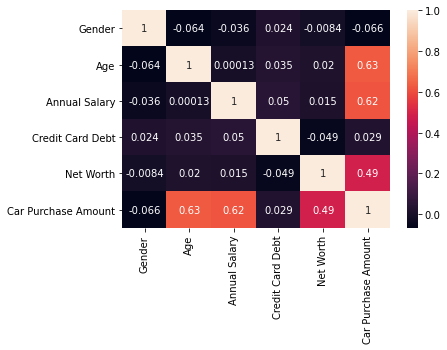

In [5]:
sns.heatmap(car_data.corr(),annot=True)

<Figure size 720x432 with 0 Axes>

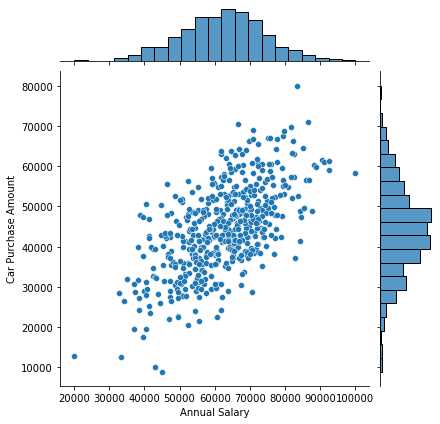

In [6]:
plt.figure(figsize=(10,6))
sns.jointplot(x='Annual Salary',y='Car Purchase Amount',data=car_data)

C:\Users\Abhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


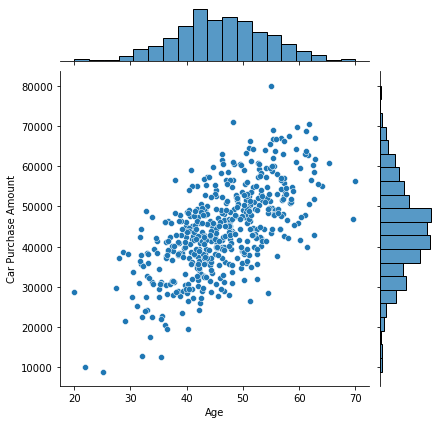

In [7]:
sns.jointplot(car_data['Age'],car_data['Car Purchase Amount'])

In [8]:
##name and email are irrelevant
train_data=car_data.drop(['Customer Name','Customer e-mail'],axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
lbe=LabelEncoder() 

In [10]:
train_data['Country'] = lbe.fit_transform(train_data['Country'])

In [11]:
X=train_data.drop(['Car Purchase Amount'],axis=1)


In [12]:
y=train_data['Car Purchase Amount']

In [13]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
y=y.values.reshape(-1,1)

In [15]:
y_scaled=scaler.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_scaled, test_size=0.20)

In [18]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
model=Sequential()
model.add(Dense(30,input_dim=6,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add((Dense(40,activation='relu')))
model.add((Dense(1,activation='linear')))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                840       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
epoch_history=model.fit(X_train,y_train,epochs=100,batch_size=25,verbose=1,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 40ms/step - loss: 0.0767 - val_loss: 0.0299
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0305 - val_loss: 0.0242
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0193 - val_loss: 0.0145
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.0084
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0076 - val_loss: 0.0058
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 11

Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 4.9380e-05 - val_loss: 4.2456e-05
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 4.7811e-05 - val_loss: 4.6004e-05
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 6.1281e-05 - val_loss: 5.1321e-05
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 4.7912e-05 - val_loss: 7.8138e-05
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 5.3156e-05 - val_loss: 9.0085e-05
Epoch 83/100
13/13 [==============================] - 0s 2ms/step - loss: 5.1105e-05 - val_loss: 4.6379e-05
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 4.4279e-05 - val_loss: 3.9979e-05
Epoch 85/100
13/13 [==============================] - ETA: 0s - loss: 2.3769e-0 - 0s 3ms/step - loss: 4.2498e-05 - val_loss: 4.9856e-05
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 4.3623e-05 - val_loss: 3.8550e-05


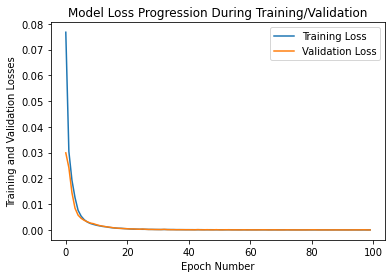

In [23]:
plt.plot(epoch_history.history['loss'])
plt.plot(epoch_history.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [24]:
pred=model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
error=mean_absolute_error(pred,y_test)
print("Error in the model is ",error)

Error in the model is  0.005514785814135859


In [27]:
def errorpercentage(y_test,pred):
    mape=np.mean(np.abs(y_test-pred)/y_test*100)
    return mape

In [31]:
print("This model is",100-errorpercentage(y_test,pred),"% accurate")

This model is 98.79572432308589 % accurate


In [29]:
X_Testing = np.array([[1, 27, 50, 50000, 10985, 629312]])
y_predict = model.predict(X_Testing)
y_predict.shape

(1, 1)

In [30]:
print("Expected amount of the car purchased is",y_predict[0][0])

Expected amount of the car purchased is 280576.97
